Step 1: Defining the Problem

Our goal is to predict the price of laptops given information about various aspects of their design.

Step 2: Our Data

We were not required to collect our own data. From a list of provided datasets, we chose a dateset of 1,302 different laptop's specifications and prices. The following cell provides an overview of our dataset.

In [11]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price.csv', encoding = 'latin1')
data = data.sort_values(by='Company')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
651,659,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,709.0
78,80,Acer,Aspire A515-51G-32MX,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,530.0
324,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg,659.0
326,332,Acer,Aspire E5-575,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.23kg,549.0
371,377,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,128GB SSD,AMD Radeon R5,Windows 10,2.1kg,426.0


Step 3: Data Cleaning & Processing

The first major step in the data science life cycle is preparing our data. Our dataset did not have any missing values. The heaviest task for us was fixing our data to remove extra text, and fitting data into categories.

In [12]:
for i in range(len(data)):
  # START OF SCREEN RESOLUTION CLEANING
  data.at[i, 'ScreenResolution'] = data.at[i, 'ScreenResolution'].split(' ')[-1].split('x')[0]
  # END OF SCREEN RESOLUTION CLEANING

  # START OF CPU CLEANING
  cpu = data.at[i, 'Cpu'].split(' ')
  if (cpu[0] == 'Intel'):
    if (cpu[1] == 'Core'):
      if (cpu[2] == 'M'):
        data.at[i, 'Cpu'] = 'Intel Core M'
      elif (cpu[2] == 'i3'):
        data.at[i, 'Cpu'] = 'Intel Core i3'
      elif (cpu[2] == 'i5'):
        data.at[i, 'Cpu'] = 'Intel Core i5'
      elif (cpu[2] == 'i7'):
        data.at[i, 'Cpu'] = 'Intel Core i7'
    elif (cpu[1] == 'Celeron'):
      data.at[i, 'Cpu'] = 'Intel Celeron'
    elif (cpu[1] == 'Pentium'):
      data.at[i, 'Cpu'] = 'Intel Pentium'
    elif (cpu[1] == 'Atom'):
      data.at[i, 'Cpu'] = 'Intel Atom'
    elif (cpu[1] == 'Xeon'):
      data.at[i, 'Cpu'] = 'Intel Xeon'
  elif (cpu[0] == 'AMD'):
    data.at[i, 'Cpu'] = 'AMD'
  elif (cpu[0] == 'Samsung'):
    data.at[i, 'Cpu'] = 'Samsung'
  # END OF CPU CLEANING

  # START OF RAM CLEANING
  data.at[i, 'Ram'] = data.at[i, 'Ram'].split('GB')[0]
  # END OF RAM CLEANING

  # START OF MEMORY CLEANING
  data.at[i, 'Memory'] = data.at[i, 'Memory'].split(' ')[0]
  if (data.at[i, 'Memory'][-2:] == 'GB'):
    data.at[i, 'Memory'] = data.at[i, 'Memory'].split('GB')[0]
  elif (data.at[i, 'Memory'][-2:] == 'TB'):
    data.at[i, 'Memory'] = str(float(data.at[i, 'Memory'].split('TB')[0]) * 1000)
  # END OF MEMORY CLEANING

  # START OF GPU CLEANING
  gpu = data.at[i, 'Gpu'].split(' ')[0]
  if (gpu == 'Intel'):
    data.at[i, 'Gpu'] = 'Intel'
  elif (gpu == 'AMD'):
    data.at[i, 'Gpu'] = 'AMD'
  elif (gpu == 'Nvidia'):
    data.at[i, 'Gpu'] = 'Nvidia'
  else:
    data.at[i, 'Gpu'] = 'ARM'
  # END OF GPU CLEANING

  # START OF OP SYS CLEANING
  os = data.at[i, 'OpSys']
  if (os == 'No OS' or os == 'Windows 10 S'):
    data.at[i, 'OpSys'] = 'Windows 10'
  if (os == 'Mac OS X'):
    data.at[i, 'OpSys'] = 'macOS'
  # END OF OP SYS CLEANING

  # START OF WEIGHT CLEANING
  data.at[i, 'Weight'] = data.at[i, 'Weight'].split('kg')[0]
  # END OF WEIGHT CLEANING

try:
  data['Price_usd'] = data['Price_euros'] * 1.09
  data = data.drop(['laptop_ID', 'Product', 'Price_euros'], axis=1)
except:
  pass

data.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_usd
651,Acer,Gaming,15.6,1920,Intel Core i5,8,1000.0,Nvidia,Linux,2.4,772.8100
78,Acer,Notebook,15.6,1920,Intel Core i3,4,1000.0,Nvidia,Windows 10,2.2,577.7000
324,Acer,Notebook,15.6,1366,AMD,8,256,AMD,Windows 10,2.2,718.3100
326,Acer,Notebook,15.6,1366,Intel Core i5,6,1000.0,Intel,Windows 10,2.23,598.4100
371,Acer,Notebook,15.6,1366,AMD,4,128,AMD,Windows 10,2.1,464.3400
74,Acer,Notebook,14.0,1366,Intel Core i3,8,1000.0,Intel,Windows 10,2.1,424.0100
379,Acer,Notebook,15.6,1920,Intel Core i7,8,1000.0,Nvidia,Linux,2.4,922.1400
392,Acer,Notebook,15.6,1366,Intel Core i5,12,1000.0,Nvidia,Windows 10,2.2,756.4491
403,Acer,Notebook,15.6,1920,Intel Core i7,8,256,Nvidia,Linux,2.5,958.1100
413,Acer,2 in 1 Convertible,13.3,1920,Intel Core i7,8,256,Intel,Windows 10,1.6,860.0209


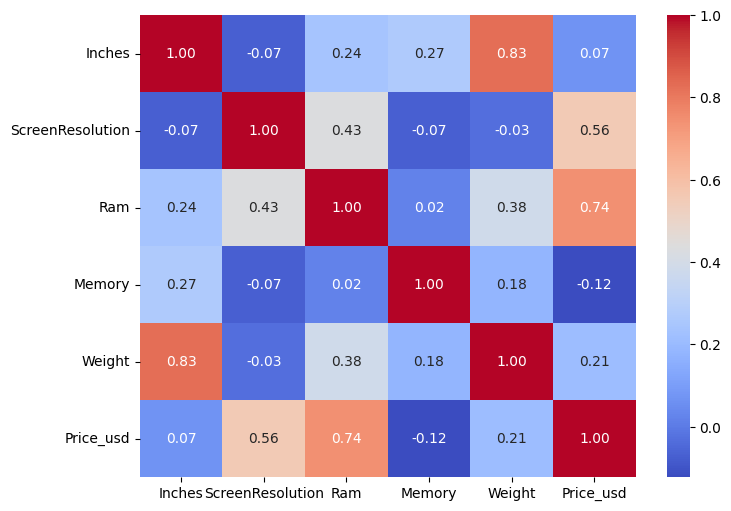

In [13]:
import seaborn as sns
numerical_cols = ['Inches', 'ScreenResolution', 'Ram', 'Memory', 'Weight']
categorical_cols = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']
data[numerical_cols] = data[numerical_cols].astype(float)
corr_m = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
  data[col] = le.fit_transform(data[col])
data.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_usd
651,0,1,15.6,1920.0,5,8.0,1000.0,3,2,2.40,772.8100
78,0,3,15.6,1920.0,4,4.0,1000.0,3,3,2.20,577.7000
324,0,3,15.6,1366.0,0,8.0,256.0,0,3,2.20,718.3100
326,0,3,15.6,1366.0,5,6.0,1000.0,2,3,2.23,598.4100
371,0,3,15.6,1366.0,0,4.0,128.0,0,3,2.10,464.3400
74,0,3,14.0,1366.0,4,8.0,1000.0,2,3,2.10,424.0100
379,0,3,15.6,1920.0,6,8.0,1000.0,3,2,2.40,922.1400
392,0,3,15.6,1366.0,5,12.0,1000.0,3,3,2.20,756.4491
403,0,3,15.6,1920.0,6,8.0,256.0,3,2,2.50,958.1100
413,0,0,13.3,1920.0,6,8.0,256.0,2,3,1.60,860.0209


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop('Price_usd', axis=1)
y = data['Price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
#X_train = X_train.drop(categorical_cols, axis=1)
#X_test = X_test.drop(categorical_cols, axis=1)
X_train.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
446,0,3,0.399985,-1.079583,5,-0.881274,0.170883,2,2,0.550511
650,2,1,1.585815,0.037367,6,4.725367,0.204977,3,3,2.668624
1004,16,3,-1.204373,0.037367,5,-0.881274,-0.886023,2,3,-1.265015
554,7,3,1.585815,0.037367,6,-0.080325,1.591455,3,3,0.898486
688,7,3,1.585815,0.037367,0,-0.480800,4.432600,0,3,0.928745


linear | rmse: 413.4652955509129 | r2 score: 0.7020680975753031
tree | rmse: 440.2851870075036 | r2 score: 0.6621631391665845
forest | rmse: 289.22790959187836 | r2 score: 0.8542128379560495
knn | rmse: 364.98418618142904 | r2 score: 0.767840221639341
svm | rmse: 417.72551232215073 | r2 score: 0.6958968735269078
xgboost | rmse: 341.46420739115405 | r2 score: 0.7967974007318454


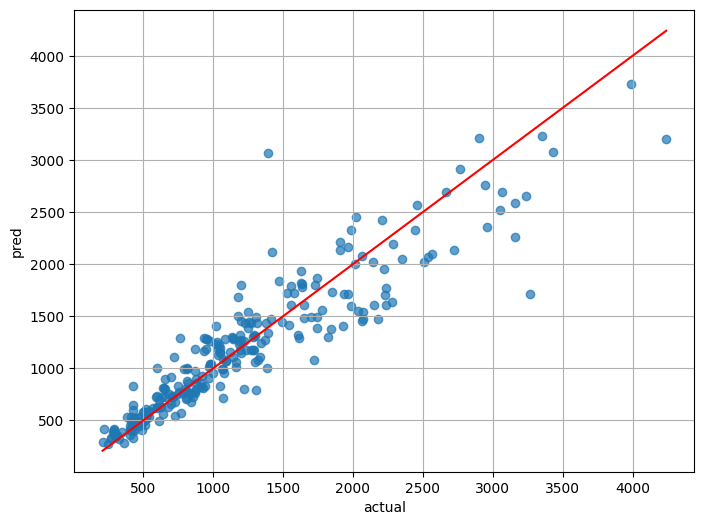

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

linear = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=2)
knn = KNeighborsRegressor(n_neighbors=5)
svr = SVR(C=100, kernel='linear')
xg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

linear.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
svr.fit(X_train, y_train)
xg.fit(X_train, y_train)

linear_y_pred = linear.predict(X_test)
tree_y_pred = tree.predict(X_test)
forest_y_pred = forest.predict(X_test)
knn_y_pred = knn.predict(X_test)
svr_y_pred = svr.predict(X_test)
xg_y_pred = xg.predict(X_test)

print('linear | rmse:', np.sqrt(mean_squared_error(y_test, linear_y_pred)), '| r2 score:', r2_score(y_test, linear_y_pred))
print('tree | rmse:', np.sqrt(mean_squared_error(y_test, tree_y_pred)), '| r2 score:', r2_score(y_test, tree_y_pred))
print('forest | rmse:', np.sqrt(mean_squared_error(y_test, forest_y_pred)), '| r2 score:', r2_score(y_test, forest_y_pred))
print('knn | rmse:', np.sqrt(mean_squared_error(y_test, knn_y_pred)), '| r2 score:', r2_score(y_test, knn_y_pred))
print('svm | rmse:', np.sqrt(mean_squared_error(y_test, svr_y_pred)), '| r2 score:', r2_score(y_test, svr_y_pred))
print('xgboost | rmse:', np.sqrt(mean_squared_error(y_test, xg_y_pred)), '| r2 score:', r2_score(y_test, xg_y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel('actual')
plt.ylabel('pred')
plt.grid(True)
plt.show()

In [9]:
from sklearn import model_selection
estimators = [20, 50, 100]
depths = [20, 50, 100]
max_features = [1, 2, 5]
for estimator in estimators:
  for depth in depths:
    for max_feature in max_features:
      kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
      model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, max_features=max_feature)
      result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
      print('e=', estimator, 'depth=', depth, 'max features=', max_feature, 'mean accuracy=%.2f%%' % (result_kfold.mean() * 100.0))

e= 20 depth= 20 max features= 1 mean accuracy=80.60%
e= 20 depth= 20 max features= 2 mean accuracy=81.39%
e= 20 depth= 20 max features= 5 mean accuracy=79.33%
e= 20 depth= 50 max features= 1 mean accuracy=81.24%
e= 20 depth= 50 max features= 2 mean accuracy=80.37%
e= 20 depth= 50 max features= 5 mean accuracy=78.63%
e= 20 depth= 100 max features= 1 mean accuracy=79.87%
e= 20 depth= 100 max features= 2 mean accuracy=80.62%
e= 20 depth= 100 max features= 5 mean accuracy=79.86%
e= 50 depth= 20 max features= 1 mean accuracy=81.11%
e= 50 depth= 20 max features= 2 mean accuracy=81.33%
e= 50 depth= 20 max features= 5 mean accuracy=80.04%
e= 50 depth= 50 max features= 1 mean accuracy=81.05%
e= 50 depth= 50 max features= 2 mean accuracy=80.90%
e= 50 depth= 50 max features= 5 mean accuracy=80.20%
e= 50 depth= 100 max features= 1 mean accuracy=80.84%
e= 50 depth= 100 max features= 2 mean accuracy=80.64%
e= 50 depth= 100 max features= 5 mean accuracy=79.97%
e= 100 depth= 20 max features= 1 mean ac